### MODULO 3 - EVALUACION FINAL - NEREA RIAL


In [102]:
# LIBRERÍAS A UTILIZAR
# ----------------------------------------------------------------------

#Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy import stats
from scipy.stats import shapiro, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

#### EJERCICIO

##### FASE 1: Exploración y Limpieza


A. CUSTOMER FLIGHT ACTIVITY


Información sobre los datos:

- Loyalty Number: Este atributo representa un identificador único para cada cliente dentro del programa de lealtad de la aerolínea. Cada número de lealtad corresponde a un cliente específico.
- Year: Indica el año en el cual se registraron las actividades de vuelo para el cliente.
- Month: Representa el mes del año (de 1 a 12) en el cual ocurrieron las actividades de vuelo.
- Flights Booked: Número total de vuelos reservados por el cliente en ese mes específico.
- Flights with Companions: Número de vuelos reservados en los cuales el cliente viajó con acompañantes.
- Total Flights: El número total de vuelos que el cliente ha realizado, que puede incluir vuelos reservados en meses anteriores.
- Distance: La distancia total (presumiblemente en millas o kilómetros) que el cliente ha volado durante el mes.
- Points Accumulated: Puntos acumulados por el cliente en el programa de lealtad durante el mes, con base en la distancia volada u otros factores.
- Points Redeemed: Puntos que el cliente ha redimido en el mes, posiblemente para obtener beneficios como vuelos gratis, mejoras, etc.
- Dollar Cost Points Redeemed: El valor en dólares de los puntos que el cliente ha redimido durante el mes

In [2]:
# Lectura del CSV 'Customer Flight Activity' y display de los 3 primeros resultados para comprobar la estructura del archivo.
flight = pd.read_csv('Files/Customer Flight Activity.csv')
flight.head(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


In [3]:
# Con el método tail, vemos las 3 últimas filas del dataframe.
flight.tail(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [9]:
print(f'El número de filas que tenemos es {flight.shape[0]} y el número de columnas es {flight.shape[1]}')
print(f'El nombre de las columnas es: {flight.columns}')

El número de filas que tenemos es 405624 y el número de columnas es 10
El nombre de las columnas es: Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')


In [22]:
# Vamos a comprobar si tenemos algún nulo en alguna columna, también podemos verlo con el .info().
flight.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [12]:
# Con '.describe' sacamos los estadísticos principales:
round(flight.describe(),2).T
# utilizamos el traspose para que lo podamos visualizarlo mejor

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.87,258935.29,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.50,0.50,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.50,3.45,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.12,5.23,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.03,2.08,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.15,6.52,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.88,1433.16,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.69,146.60,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.70,125.49,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.48,10.15,0.0,0.00,0.0,0.00,71.0


Podemos sacar unas pequeñas conclusiones a priori a través del dataframe anterior:
- Usar los estadísticos del 'loyalty number' no tiene lógica debido a que son números pero identificativos e unipersonales. No tiene sentido calcular una media de un ID de usuario, o los percentiles.
- Los años únicamente son 2017 y 2018. Siendo la mayor parte, hasta el percentil 75 de los datos en el año 2017.
- La media de vuelos reservados por los clientes es de 4.12 vuelos
- La distancia media recorrida de todo nuestro conjunto de datos son 1208.88 (millas)
- El máximo de puntos acumulados son 676.5 y de distancia 6.293 millas.
- La media de dinero en dólares equivalente a los puntos es de 2.48 dólares.

In [17]:
# Sacamos los estadísticos de las columnas categóricas si las hay:
# flight.describe(include = 'object').T

# Nuestro dataframe NO tiene columnas categóricas. Son todas tipo int, menos puntos acumulados que es tipo float.
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [69]:
# Con el .unique sacaremos los valores únicos, es decir, podremos saber cuántos clientes tenemos en total:
aa = flight['Loyalty Number'].unique()
print(f'Tenemos {len(aa)} usuarios en total.')

Tenemos 16737 usuarios en total.


In [ ]:
# Almacenamos en un dataframe los duplicados para ver cómo son y analizarlos:
duplicated_df = flight[flight.duplicated(keep=False)]

In [95]:
duplicated_df.head(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
226,112142,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
477,126100,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
566,130331,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
659,135421,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0


Tras analizar cómo son los valores duplicados incluso cómo son los datos cuando algunas columnas tienen distintos registros, decidimos proceder a eliminar únicamente los duplicados donde absolutamente toda la fila está duplicada.

In [107]:
# Procedemos a borrar los duplicados:
flight = flight.drop_duplicates()

In [108]:
# Volvemos a comprobar cuántas filas tenemos en nuestro DataFrame:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 33.9 MB


In [109]:
# Guardamos el CSV limpio.
flight.to_csv('Files/flight-activity-clean.csv')

B. CUSTOMER LOYALTY HISTORY

Información sobre los datos:

Este CSV proporciona un perfil detallado de los clientes, incluyendo su ubicación, nivel educativo, ingresos, estado civil, y detalles sobre su membresía en el programa de lealtad (como el tipo de tarjeta, valor de vida del cliente, y fechas de inscripción y cancelación).

- Loyalty Number: Identificador único del cliente dentro del programa de lealtad. Este número permite correlacionar la información de este archivo con el archivo de actividad de vuelos.
- Country: País de residencia del cliente.
- Province: Provincia o estado de residencia del cliente (aplicable a países con divisiones provinciales o estatales, como Canadá).
- City: Ciudad de residencia del cliente.
- Postal Code: Código postal del cliente.
- Gender: Género del cliente (ej. Male para masculino y Female para femenino).
- Education: Nivel educativo alcanzado por el cliente (ej. Bachelor para licenciatura, College para estudios universitarios o técnicos, etc.).
- Salary: Ingreso anual estimado del cliente.
- Marital Status: Estado civil del cliente (ej. Single para soltero, Married para casado, Divorced para divorciado, etc.).
- Loyalty Card: Tipo de tarjeta de lealtad que posee el cliente. Esto podría indicar distintos niveles o categorías dentro del programa de lealtad.
- CLV (Customer Lifetime Value): Valor total estimado que el cliente aporta a la empresa durante toda la relación que mantiene con ella.
- Enrollment Type: Tipo de inscripción del cliente en el programa de lealtad (ej. Standard).
- Enrollment Year: Año en que el cliente se inscribió en el programa de lealtad.
- Enrollment Month: Mes en que el cliente se inscribió en el programa de lealtad.
- Cancellation Year: Año en que el cliente canceló su membresía en el programa de lealtad, si aplica.
- Cancellation Month: Mes en que el cliente canceló su membresía en el programa de lealtad, si aplica.


In [165]:
# Lectura del CSV 'Customer Flight Activity' y display de los 3 primeros resultados para comprobar la estructura del archivo:
loyalty = pd.read_csv('Files/Customer Loyalty History.csv')
loyalty.head(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


In [128]:
# Con el método tail, vemos las 3 últimas filas del dataframe:
loyalty.tail(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [113]:
print(f'El número de filas que tenemos es {loyalty.shape[0]} y el número de columnas es {loyalty.shape[1]}')
print(f'El nombre de las columnas es: {loyalty.columns}')

El número de filas que tenemos es 16737 y el número de columnas es 16
El nombre de las columnas es: Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')


Nota: si nos fijamos, el nº de filas de este CSV coincide con la suma de los valores únicos del otro CSV de la columna 'Loyalty Number', es decir, como ya analizamos en el anterior archivo, tenemos 16737 clientes.

In [129]:
# Vamos a comprobar si tenemos algún nulo en alguna columna, también podemos verlo con el .info().
loyalty.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [130]:
# Viendo el porcentaje, es un dato interesante para valorar su tratamiento:
print(round(loyalty.isnull().mean() * 100,2))

Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Salary                25.32
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
Cancellation Year     87.65
Cancellation Month    87.65
dtype: float64


Tenemos nulos en:
- Salario, con un 25%
- Año de cancelación: con un 87,65% 
- Mes de cancelación: con un 87,65%, coincidiendo con el año.

Antes de pasar a ver los estadísticos, debemos tratar los nulos.

In [131]:
# Ojeamos los nulos de la columna 'Salary':
loyalty['Salary']

0         83236.0
1             NaN
2             NaN
3             NaN
4        103495.0
           ...   
16732         NaN
16733     89210.0
16734         NaN
16735    -57297.0
16736     75049.0
Name: Salary, Length: 16737, dtype: float64

In [166]:
# Primero vamos a eliminar los negativos, quitándole el signo -. Lo comprendemos como un error de imputación y transformaremos los negativos a valores absolutos:
loyalty['Salary'] = abs(loyalty['Salary'])
loyalty['Salary']

0         83236.0
1             NaN
2             NaN
3             NaN
4        103495.0
           ...   
16732         NaN
16733     89210.0
16734         NaN
16735     57297.0
16736     75049.0
Name: Salary, Length: 16737, dtype: float64

El método ABS() nos devuelve el VALOR ABSOLUTO. Ya que, salario no puede contener valores negativos. 

In [167]:
# Vamos a mirar información acerca de los nulos en la columna 'Salary':
loyalty['Salary'].isnull().sum()

4238

In [151]:
# Almacenamos los nulos para comprobar cómo son y qué características tienen:
nulos = loyalty[loyalty['Salary'].isnull()]
nulos.head(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN


In [153]:
nulos.sample(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
10325,769709,Canada,Nova Scotia,Halifax,B3J 9S2,Female,College,NaN,Married,Star,2396.22,Standard,2014,4,NaN,NaN
8168,332409,Canada,Saskatchewan,Regina,S1J 3C5,Female,College,NaN,Single,Nova,8470.04,Standard,2012,7,NaN,NaN
13836,101547,Canada,Ontario,Toronto,M2M 7K8,Female,College,NaN,Married,Star,5619.69,Standard,2017,10,NaN,NaN


Los nulos visualizados en el DataFrame coinciden en que su educación es nivel 'College'.
Desconocemos el origen de que sea un valor nulo, si es que ha sido un error de traspaso de datos, o hay una ausencia justificada con que simplemente no hay ese dato.

Dependiendo de a futuro el uso que le vayamos a dar a estos datos, podemos concluir:
- Podemos sustituir los nulos por 0, pero interfiere en las estadísticas descriptivas. 
- Podemos sustituir los nulos por la media de los salarios, sin interferir en las estadísticas descriptivas, pero considerando no relevantes estos datos. 

In [173]:
# Decidimos sustituir los nulos de 'Salary' por la media del resto de columnas:

salary_mean = loyalty['Salary'].mean()
description = round(loyalty.describe(),2).T

print(salary_mean)

loyalty['Salary'] = loyalty['Salary'].fillna(salary_mean)

print(f'Los datos descriptivos después de la sustitución:{description}')

79359.34090727258
Los datos descriptivos después de la sustitución:                      count       mean        std        min        25%  \
Loyalty Number      16737.0  549735.88  258912.13  100018.00  326603.00   
Salary              12499.0   79359.34   34749.69    9081.00   59246.50   
CLV                 16737.0    7988.90    6860.98    1898.01    3980.84   
Enrollment Year     16737.0    2015.25       1.98    2012.00    2014.00   
Enrollment Month    16737.0       6.67       3.40       1.00       4.00   
Cancellation Year    2067.0    2016.50       1.38    2013.00    2016.00   
Cancellation Month   2067.0       6.96       3.46       1.00       4.00   

                          50%        75%        max  
Loyalty Number      550434.00  772019.00  999986.00  
Salary               73455.00   88517.50  407228.00  
CLV                   5780.18    8940.58   83325.38  
Enrollment Year       2015.00    2017.00    2018.00  
Enrollment Month         7.00      10.00      12.00  
Cancella

In [155]:
# Con '.describe' sacamos los estadísticos principales ANTES DE LA LIMPIEZA:
round(loyalty.describe(),2).T
# utilizamos el traspose para que lo podamos visualizarlo mejor

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.88,258912.13,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79359.34,34749.69,9081.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.90,6860.98,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.25,1.98,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.67,3.40,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.50,1.38,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.96,3.46,1.00,4.00,7.00,10.00,12.00


In [174]:
# Recordamos qué valores nulos tenemos todavía:
loyalty.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                    0
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [175]:
# Decidimos dropear esas columnas debido a que tienen un 86% de nulos y no aporta información importante.
# NOTA: para valorar si tienen información importante, primero hemos considerado la información que queremos sacar de este CSV.
loyalty = loyalty.drop(['Cancellation Year', 'Cancellation Month'], axis=1)

In [176]:
# Última comprobación de nulos en el DataFrame:
loyalty.isnull().sum()

Loyalty Number      0
Country             0
Province            0
City                0
Postal Code         0
Gender              0
Education           0
Salary              0
Marital Status      0
Loyalty Card        0
CLV                 0
Enrollment Type     0
Enrollment Year     0
Enrollment Month    0
dtype: int64

In [180]:
# Vemos como nos ha quedado nuestro DataFrame:
loyalty.sample(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
10005,569236,Canada,New Brunswick,Fredericton,E3B 2H2,Male,College,79359.340907,Single,Star,2241.46,Standard,2013,9
12846,356980,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,64272.000000,Married,Star,4510.19,Standard,2012,7
1389,510513,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,78112.000000,Married,Aurora,5686.92,Standard,2014,8


In [181]:
# Guardamos nuestro DataFrame:
loyalty.to_csv('Files/loyalty-history-clean.csv')

### Unión de los datos

Después de una exploración inicial de ambos CSVs, vamos a proceder a unirlos y a continuación, revisar la integridad, coherencia y legibilidad de los datos.

In [185]:
# Antes de nada, vamos a revisar las columnas de ambos DataFrames.
loyalty.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.000000,Married,Star,3839.14,Standard,2016,2
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,79359.340907,Divorced,Star,3839.61,Standard,2016,3


In [184]:
flight.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


In [190]:
# Generamos dos variables para almacenar cada csv.
# Utilizamos el 'inner' para que se incluyan únicamente las filas comunes de ambas tablas

csv1 = pd.read_csv('Files/flight-activity-clean.csv')
csv2 = pd.read_csv('Files/loyalty-history-clean.csv')

df = pd.merge(csv1, csv2, on='Loyalty Number', how='inner')

In [192]:
df.head(2)

,Unnamed: 0_x,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Unnamed: 0_y,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,0,100018,2017,1,3,0,3,1521,152.0,0,0,2320,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8
1,16901,100018,2017,2,2,2,4,1320,132.0,0,0,2320,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8


In [194]:
# Eliminamos columnas que no aportan nada al DataFrame:
df.drop(['Unnamed: 0_x','Unnamed: 0_y'], axis=1, inplace=True)

In [199]:
df.sample(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
228707,661274,2017,11,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,90587.0,Married,Aurora,5408.91,Standard,2014,1
172100,517729,2017,5,2,2,4,2172,217.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,65131.0,Married,Nova,5460.32,Standard,2017,3
4820,111584,2017,4,4,0,4,1096,109.0,0,0,Canada,Ontario,Toronto,M8Y 4K8,Female,Doctor,68273.0,Divorced,Nova,4163.79,Standard,2017,1


In [197]:
df.to_csv('Files/customers-merged.csv')

In [6]:
df = pd.read_csv('Files/customers-merged.csv', index_col=0)

### FASE 2: Visualización

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [37]:
# Agrupamos por mes, el total de billetes reservados:
month_flights = df.groupby('Month')['Flights Booked'].sum().reset_index()

months = ['Jan', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'] # Para poder dar leyenda a las X en el gráfico:

month_flights

,Month,Flights Booked
0,1,96936
1,2,96334
2,3,131199
3,4,112511
4,5,142170
5,6,173242
6,7,193431
7,8,169204
8,9,136379
9,10,129461


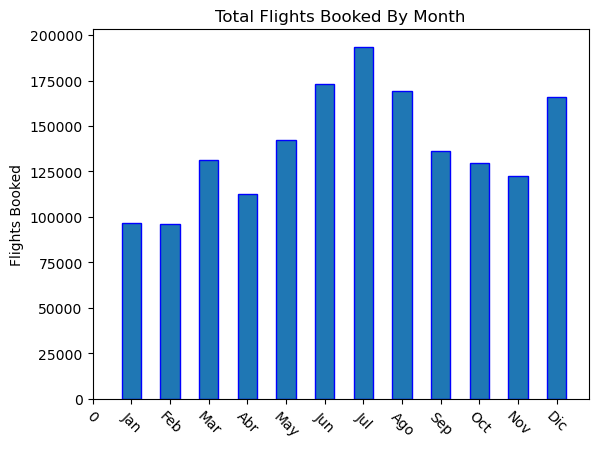

In [97]:
# Vamos a printear un histograma debido a que vamos a representar la distribución de una variable numérica como es
# el total de vuelos comprados por mes. 

# En Matpotlib:

fig, ax = plt.subplots()

months = month_flights['Month']
counts = month_flights['Flights Booked']

ax.bar(months, 
       counts, 
       edgecolor='blue', 
       width=0.5, 
       data=month_flights) 

ax.set_ylabel('Flights Booked')
ax.set_xticklabels([0, 'Jan', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']) 
ax.set_title('Total Flights Booked By Month')

# Le decimos que el rango de las X es de 0 a 12, que van de 1 en 1 y rotamos las etiquetas del eje X para verse mejor:
plt.xticks(np.arange(0, 13, step=1),rotation=-45)

plt.show()

El mes con más vuelos reservados es Julio y el que menos Enero. Ahora entendemos por qué están tan baratos los billetes en enero.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [103]:
# Vamos a comprobar qué tipo de dato es Distancia y Puntos acumulados:
print(df['Distance'].dtype)
print(df['Points Accumulated'].dtype)

int64
float64


Para identificar correlaciones entre dos variables utilizaremos un Gráfico de dispersión.

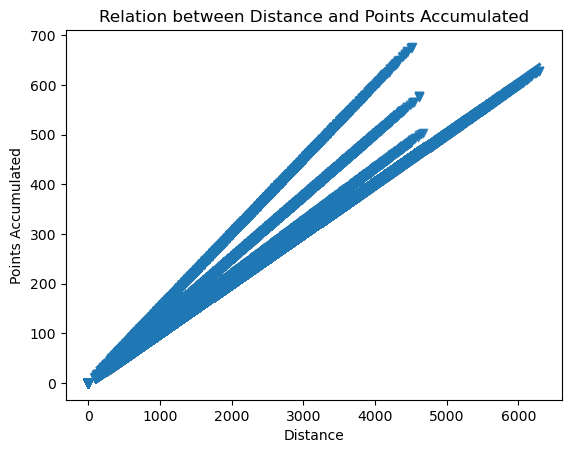

In [143]:
sns.regplot(x='Distance',
            y='Points Accumulated',
            data = df,
            marker = 'v')

plt.xlabel('Distance')
plt.ylabel('Points Accumulated')
plt.title('Relation between Distance and Points Accumulated');

Podemos entender que, tienen una correlación positiva. Ya que, a medida que es más grande la distancia, mayor es la cantidad de puntos acumulados.

In [139]:
# Calculamos la medida de correlación para comprobar que lo que nos muestra el gráfico tiene sentido:
## Cálculo de correlación entre las variables Distancia y Puntos Acumulados:
correlation = df['Distance'].corr(df['Points Accumulated'])
print(f'Coeficiente de correlación: {correlation}')

# El coeficiente de relación es muy próximo a 1, que significa que las dos variables itenen una 'Correlación Fuerte'.

Coeficiente de correlación: 0.9945458005650699


3. ¿Cuál es la distribución de los clientes por provincia o estado?


In [60]:
# Vamos a visualizar los datos que presentaremos en un dataframe:

df_customerByProvince = df.groupby('Province')['Loyalty Number'].count().reset_index()

In [61]:
df_customerByProvince # Printeamos el DataFrame para comprobar su esquema

,Province,Loyalty Number
0,Alberta,23360
1,British Columbia,106442
2,Manitoba,15900
3,New Brunswick,15352
4,Newfoundland,6244
5,Nova Scotia,12507
6,Ontario,130258
7,Prince Edward Island,1584
8,Quebec,79573
9,Saskatchewan,9861


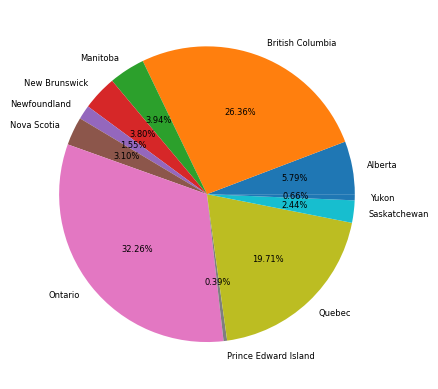

<Figure size 1000x800 with 0 Axes>

In [63]:
autopct = lambda p:f'{p:.2f}%' # Configuramos una variable que aloja una función lambda para darle formato a los porcentajes

plt.pie('Loyalty Number', labels= "Province",
        data = df_customerByProvince, 
        autopct=autopct, 
        textprops={'fontsize': 6}, 
        startangle=0)

plt.figure(figsize=(10, 8));

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [39]:
# Primero vamos a calcular el salario promedio de cada nivel educativo:

df_salary_by_education = round(df.groupby('Education')['Salary'].mean().reset_index(),2) # redondeamos a centavos
df_salary_by_education

,Education,Salary
0,Bachelor,72599.08
1,College,79359.34
2,Doctor,178403.68
3,High School or Below,61146.38
4,Master,103734.52


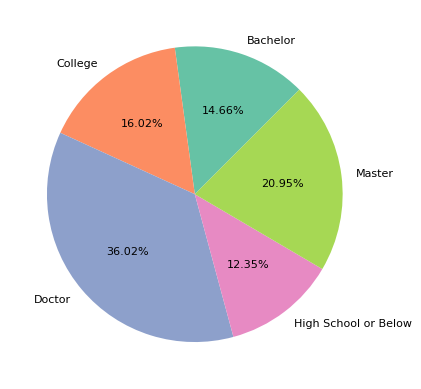

In [41]:
# Como son pocas variables categóricas, será muy visual utilizar un gráfico de quesos:

plt.pie('Salary', 
        labels='Education',
        data = df_salary_by_education,
        autopct = '%.2f%%',
        colors=sns.color_palette('Set2'),
        textprops={'fontsize':8},
        startangle=45);

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [45]:
# Comprobamos los valores únicos de 'Loyalty Card' para conocer cuáles son y cuántos hay:
df['Loyalty Card'].unique()

array(['Aurora', 'Nova', 'Star'], dtype=object)

In [47]:
# Agrupamos nuestros datos según el tipo de tarjeta de fidelización y los incluímos en un DataFrame:
df_loyaltyCards = df.groupby('Loyalty Card')['Loyalty Number'].count().reset_index()
df_loyaltyCards

,Loyalty Card,Loyalty Number
0,Aurora,83132
1,Nova,136883
2,Star,183745


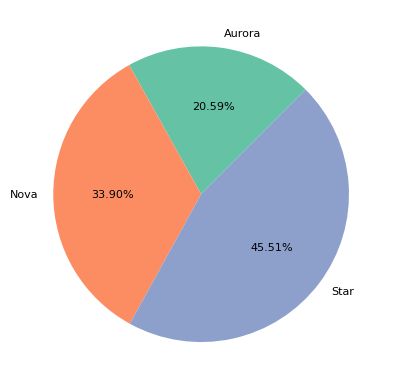

In [81]:
plt.pie('Loyalty Number', 
        labels='Loyalty Card',
        data = df_loyaltyCards,
        autopct = '%.2f%%',
        colors=sns.color_palette('Set2'),
        textprops={'fontsize':8},
        startangle=45);

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [49]:
df.head(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8


In [72]:
df_doubleGroup = df.groupby(['Gender', 'Marital Status'])['Loyalty Number'].count().reset_index()
df_doubleGroup

,Gender,Marital Status,Loyalty Number
0,Female,Divorced,30634
1,Female,Married,117363
2,Female,Single,54760
3,Male,Divorced,30128
4,Male,Married,117482
5,Male,Single,53393


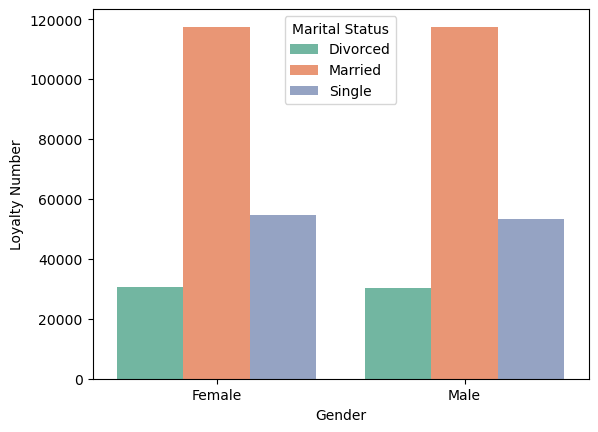

In [80]:
# Gráfico de barras en Seaborn:
sns.barplot(
    data=df_doubleGroup, 
    x='Gender', 
    y='Loyalty Number', 
    hue='Marital Status',  # Le determinamos cómo se debe agrupar
    palette='Set2'
);

### BONUS Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. 


1. **Preparación de Datos**: Filtración del conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [33]:
df_bonus = df[['Flights Booked','Education']]
df_bonus

,Flights Booked,Education
0,3,Bachelor
1,2,Bachelor
2,6,Bachelor
3,4,Bachelor
4,0,Bachelor
...,...,...
403755,0,Bachelor
403756,0,Bachelor
403757,0,Bachelor
403758,0,Bachelor


2. **Análisis descriptivo**: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como promedio, la desviación estándar) del número de vuelos reservados para cada grupo.

In [87]:
df_groupEducation = df_bonus.groupby('Education')['Flights Booked'].count().reset_index()
df_groupEducation


,Education,Flights Booked
0,Bachelor,252567
1,College,102260
2,Doctor,17731
3,High School or Below,18915
4,Master,12287


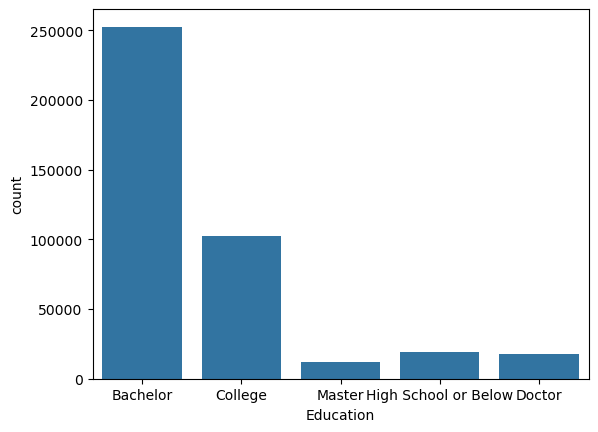

In [97]:
sns.countplot(x = 'Education',
    data = df);

In [77]:
print(df[df['Education'] == 'Bachelor']['Flights Booked'].mean())
print(df[df['Education'] == 'Bachelor']['Flights Booked'].median())
print(df[df['Education'] == 'Bachelor']['Flights Booked'].mode())


4.11028756725938
1.0
0    0
Name: Flights Booked, dtype: int64


In [98]:
def print_stadistics(method):

    education_list = ['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master']

    if method == 'mean':
        
        for item in education_list:  # Recorrer cada grupo y su media.
            filter = df[df['Education'] == item]
            mean_value = filter['Flights Booked'].mean()
            print(f"La media de 'Vuelos Reservados' para el grupo '{item}' es: {mean_value}")

    elif method == 'median':

        for item in education_list:  # Recorrer cada grupo y su media.
            filter = df[df['Education'] == item]
            median_value = filter['Flights Booked'].median()

            if pd.notna(median_value): #comprobamos que no sea nula:
                print(f"La media de 'Vuelos Reservados' para el grupo '{item}' es: {median_value}")
            else: 
                print(f"No hay datos suficientes para el grupo '{item}'.")

    elif method == 'mode': # Calcular el valor que más se repite

        for item in education_list:  # Recorrer cada grupo y su media.
            filter = df[df['Education'] == item]
            mode_values = filter['Flights Booked'].mode()

            if not mode_values.empty:
                mode_values_list = []
                mode_values_list = ", ".join(map(str, mode_values))
                if len(mode_values) > 1:
                    print(f'El grupo "{item}" tiene varias modas.')
                    print(f'Las modas son: {mode_values_list}')
                else:
                    print(f"La moda de 'Vuelos Reservados' para el grupo '{item}' es: {mode_values_list}")
            else:
                print(f"No hay datos suficientes para el grupo '{item}'.")
    
    elif method == 'var':

        for item in education_list:  # Recorrer cada grupo y su media.
            filter = df[df['Education'] == item]
            var = filter['Flights Booked'].var()
            print(f"La varianza de 'Vuelos Reservados' para el grupo '{item}' es: {np.round(var, 2)}")
            print(f'La desviación típica o estándar para el grupo {item} es: {np.sqrt(var)}')

        else: 
            print(f"No hay datos suficientes para el grupo '{item}'.")


    else:
        print(f'Función no reconocida, introduzca lo que desee calcular: mean (media), median (mediana) o moda (mode).')


In [80]:
# Llamamos a la función indicándole la columna:
print_stadistics('mean')

La media de 'Vuelos Reservados' para el grupo 'Bachelor' es: 4.11028756725938
La media de 'Vuelos Reservados' para el grupo 'College' es: 4.169743790338353
La media de 'Vuelos Reservados' para el grupo 'Doctor' es: 4.175511815464441
La media de 'Vuelos Reservados' para el grupo 'High School or Below' es: 4.176209357652657
La media de 'Vuelos Reservados' para el grupo 'Master' es: 4.200699926751851


In [79]:
# Llamamos a la función indicándole la columna:
print_stadistics('median')

La media de 'Vuelos Reservados' para el grupo 'Bachelor' es: 1.0
La media de 'Vuelos Reservados' para el grupo 'College' es: 1.0
La media de 'Vuelos Reservados' para el grupo 'Doctor' es: 1.0
La media de 'Vuelos Reservados' para el grupo 'High School or Below' es: 1.0
La media de 'Vuelos Reservados' para el grupo 'Master' es: 1.0


In [78]:
# Llamamos a la función indicándole la columna:
print_stadistics('mode')

La moda de 'Vuelos Reservados' para el grupo 'Bachelor' es: 0
La moda de 'Vuelos Reservados' para el grupo 'College' es: 0
La moda de 'Vuelos Reservados' para el grupo 'Doctor' es: 0
La moda de 'Vuelos Reservados' para el grupo 'High School or Below' es: 0
La moda de 'Vuelos Reservados' para el grupo 'Master' es: 0


In [99]:
# Llamamos a la función indicándole la columna:
print_stadistics('var')

# La varianza es la medida de dispersión que representa la variabilidad de los datos respecto a la media aritmética de éstos.
# Es decir, entorno a 27 uds de billetes están de dispersas respecto a la media.
# La desviación típica es la raíz cuadrada de la varianza.

La varianza de 'Vuelos Reservados' para el grupo 'Bachelor' es: 27.27
La desviación típica o estándar para el grupo Bachelor es: 5.2216705320438
La varianza de 'Vuelos Reservados' para el grupo 'College' es: 27.52
La desviación típica o estándar para el grupo College es: 5.246040210102612
La varianza de 'Vuelos Reservados' para el grupo 'Doctor' es: 27.64
La desviación típica o estándar para el grupo Doctor es: 5.256971345624641
La varianza de 'Vuelos Reservados' para el grupo 'High School or Below' es: 27.45
La desviación típica o estándar para el grupo High School or Below es: 5.239266656747131
La varianza de 'Vuelos Reservados' para el grupo 'Master' es: 27.19
La desviación típica o estándar para el grupo Master es: 5.213956167898926
No hay datos suficientes para el grupo 'Master'.


3. **Prueba Estadística**: Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [100]:
# Convertimos nuestros datos a arrays:
 
# ['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master']

array_bachelor = np.array(df[df['Education'] == 'Bachelor']['Flights Booked'])
array_college = np.array(df[df['Education'] == 'College']['Flights Booked'])
array_doctor = np.array(df[df['Education'] == 'Doctor']['Flights Booked'])
array_highschool = np.array(df[df['Education'] == 'High School or Below']['Flights Booked'])
array_master = np.array(df[df['Education'] == 'Master']['Flights Booked'])

Definimos la hipótesis:

- H0 o Hipótesis Nula: no hay diferencia significativa entre el nº de vuelos reservados ('Flights Booked') con los diferentes niveles educativos ('Education').
- H1 o Hipótesis Alternativa: es que hay diferencia significativa entre el nº de vuelos reservados entre estos grupos de nivel de estudios.

Establecer el nivel de significación:

- El nivel de significación, alpha, es generalmente establecido en 0.05.


Calcular la estadística de prueba y el P-Valor:

- Se utiliza la prueba t de Student para comparar la media de los grupos
- Debemos realizar una comparación de par a par, debido a que, la prueba T de Student solamente puede comparar dos grupos.

In [110]:
# Para automatizar el proceso de hacer la prueba T de Student, y que nos guarde de manera visual los datos y conclusiones:

results = []

def compare_groups(group1, group2, name1, name2):
    t_stat, p_valor = stats.ttest_ind(group1, group2, equal_var=False)  # No presunción de varianzas iguales 
    reject_null = p_valor < 0.05  # Umbral del 5% para rechazar la hipótesis nula
    return { # Generamos un diccionario con los siguientes datos:
        'Study Group 1': name1,
        'Study Group 2': name2,
        'T-statistic': t_stat,
        'P-value': p_valor,
        'Reject Null Hypothesis': reject_null
    }

# Comparaciones
results.append(compare_groups(array_bachelor, array_college, 'Bachelor', 'College'))
results.append(compare_groups(array_bachelor, array_doctor, 'Bachelor', 'Doctor'))
results.append(compare_groups(array_bachelor, array_highschool, 'Bachelor', 'High School or Below'))
results.append(compare_groups(array_bachelor, array_master, 'Bachelor', 'Master'))

results.append(compare_groups(array_college, array_doctor, 'College', 'Doctor'))
results.append(compare_groups(array_college, array_highschool, 'College', 'High School or Below'))
results.append(compare_groups(array_college, array_master, 'College', 'Master'))

results.append(compare_groups(array_doctor, array_highschool, 'Doctor', 'High School or Below'))
results.append(compare_groups(array_doctor, array_master, 'Doctor', 'Master'))

results.append(compare_groups(array_highschool, array_master, 'High School or Below', 'Master'))

results_dataframe = pd.DataFrame(results)

In [114]:
results_dataframe

,Study Group 1,Study Group 2,T-statistic,P-value,Reject Null Hypothesis
0,Bachelor,College,-3.061818,0.002200,True
1,Bachelor,Doctor,-1.597709,0.110123,False
2,Bachelor,High School or Below,-1.669479,0.095037,False
3,Bachelor,Master,-1.876889,0.060555,False
4,College,Doctor,-0.134918,0.892678,False
5,College,High School or Below,-0.155883,0.876127,False
6,College,Master,-0.621407,0.534341,False
7,Doctor,High School or Below,-0.012714,0.989856,False
8,Doctor,Master,-0.410166,0.681688,False
9,High School or Below,Master,-0.404609,0.685768,False


In [115]:
# Imputamos una columna con las conclusiones para que sea más entendible cada resultado:

results_dataframe['Conclusion'] = results_dataframe['Reject Null Hypothesis'].apply(
    lambda x: 'Si hay diferencia significativa entre ambas variables' if x else 'No hay diferencia significativa entre ambas variables'
)

In [116]:
results_dataframe

,Study Group 1,Study Group 2,T-statistic,P-value,Reject Null Hypothesis,Conclusion
0,Bachelor,College,-3.061818,0.002200,True,Si hay diferencia significativa entre ambas va...
1,Bachelor,Doctor,-1.597709,0.110123,False,No hay diferencia significativa entre ambas va...
2,Bachelor,High School or Below,-1.669479,0.095037,False,No hay diferencia significativa entre ambas va...
3,Bachelor,Master,-1.876889,0.060555,False,No hay diferencia significativa entre ambas va...
4,College,Doctor,-0.134918,0.892678,False,No hay diferencia significativa entre ambas va...
5,College,High School or Below,-0.155883,0.876127,False,No hay diferencia significativa entre ambas va...
6,College,Master,-0.621407,0.534341,False,No hay diferencia significativa entre ambas va...
7,Doctor,High School or Below,-0.012714,0.989856,False,No hay diferencia significativa entre ambas va...
8,Doctor,Master,-0.410166,0.681688,False,No hay diferencia significativa entre ambas va...
9,High School or Below,Master,-0.404609,0.685768,False,No hay diferencia significativa entre ambas va...
